# Research Questions

## RQ1: How does the numeric rating/score of reviews affect the booking rates of listings?

#Note, code commented out should be not run but can be to understand problem solving and chain of thought we used.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(20386, 75)
(8056, 75)
(39202, 75)
(91778, 75)
(25480, 75)
(511139, 6)
(378989, 6)
(986810, 6)
(1649190, 6)
(560773, 6)


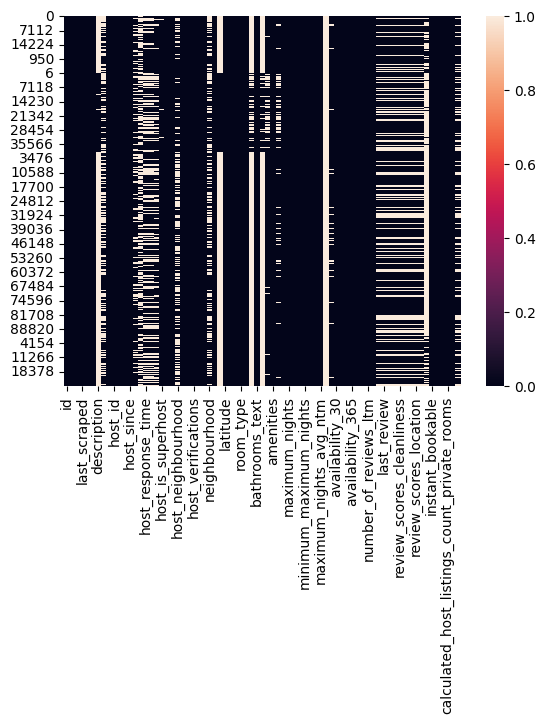

In [16]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)
            print(d.shape)

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

def visualize_missing_values(df):
    sns.heatmap(df.isnull())
    
combine_data()

visualize_missing_values(listings)

In [17]:


listings['price']

0           $45.00
1          $180.00
2           $34.00
3           $45.00
4           $63.00
           ...    
25475      $217.00
25476    $1,689.00
25477      $920.00
25478      $429.00
25479      $203.00
Name: price, Length: 184902, dtype: object

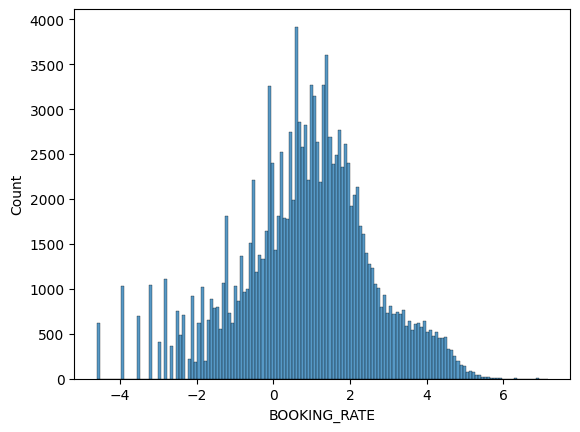

In [18]:
short_term_listings = listings[listings['minimum_nights_avg_ntm'] < 100]
short_term_listings = short_term_listings[short_term_listings['reviews_per_month'] < 20]


short_term_listings['BOOKING_RATE'] = np.log(short_term_listings['minimum_nights'] * short_term_listings['reviews_per_month'])
# sns.histplot(short_term_listings['reviews_per_month'])
sns.histplot(short_term_listings['BOOKING_RATE'])
plt.show()



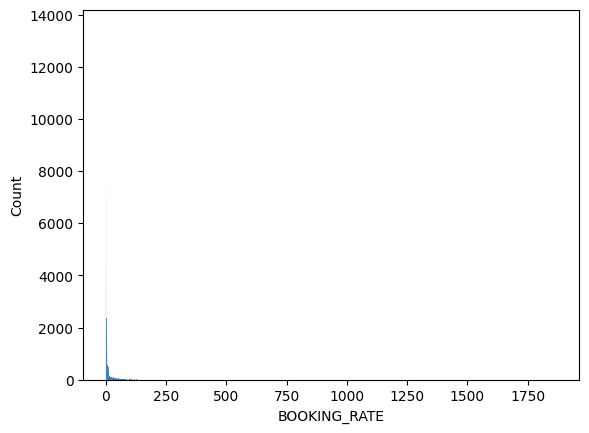

In [19]:

# WITHOUT LOG

listings['BOOKING_RATE'] = listings['minimum_nights'] * listings['reviews_per_month']
sns.histplot(listings['BOOKING_RATE'])
plt.show()

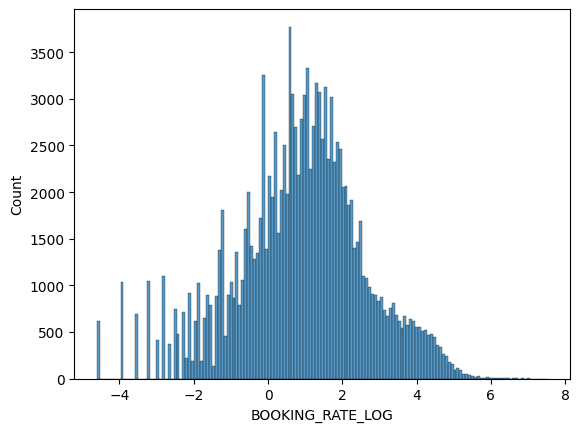

In [20]:
# listings['BOOKING_RATE'] = listings['minimum_nights_avg_ntm'] * listings['reviews_per_month']

# WITH LOG
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'])
sns.histplot(listings['BOOKING_RATE_LOG'])
plt.show()


In [21]:
# sns.scatterplot(data=listings, x='review_scores_rating', y='BOOKING_RATE_LOG')
# plt.scatter(listings['r?eview_scores_rating'], listings['BOOKING_RATE_LOG'])
plt.show()

In [22]:
# List of column names you want to include in the correlation analysis
columns_to_include = ['accommodates', 'beds', 'minimum_nights', 'maximum_nights', 
                        'availability_30', 'availability_60', 'availability_90', 
                        'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                        'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                        'review_scores_location', 'review_scores_value']

# Select only the specified columns
listings_selected = listings[columns_to_include]

# Now compute the correlation matrix for the selected columns
correlation_matrix = listings_selected.corr()
print(correlation_matrix)

                             accommodates      beds  minimum_nights  \
accommodates                     1.000000  0.829580       -0.054365   
beds                             0.829580  1.000000       -0.023127   
minimum_nights                  -0.054365 -0.023127        1.000000   
maximum_nights                  -0.003002 -0.001679        0.000430   
availability_30                  0.050773  0.022939       -0.007400   
availability_60                  0.060242  0.030320       -0.032761   
availability_90                  0.060660  0.030618       -0.040488   
availability_365                 0.075346  0.048766       -0.018979   
number_of_reviews               -0.021210 -0.018633       -0.065132   
number_of_reviews_ltm            0.006906 -0.001841       -0.134621   
number_of_reviews_l30d           0.014883 -0.001036       -0.142477   
review_scores_rating             0.008009  0.006940       -0.013197   
review_scores_accuracy          -0.008136 -0.007572       -0.002648   
review

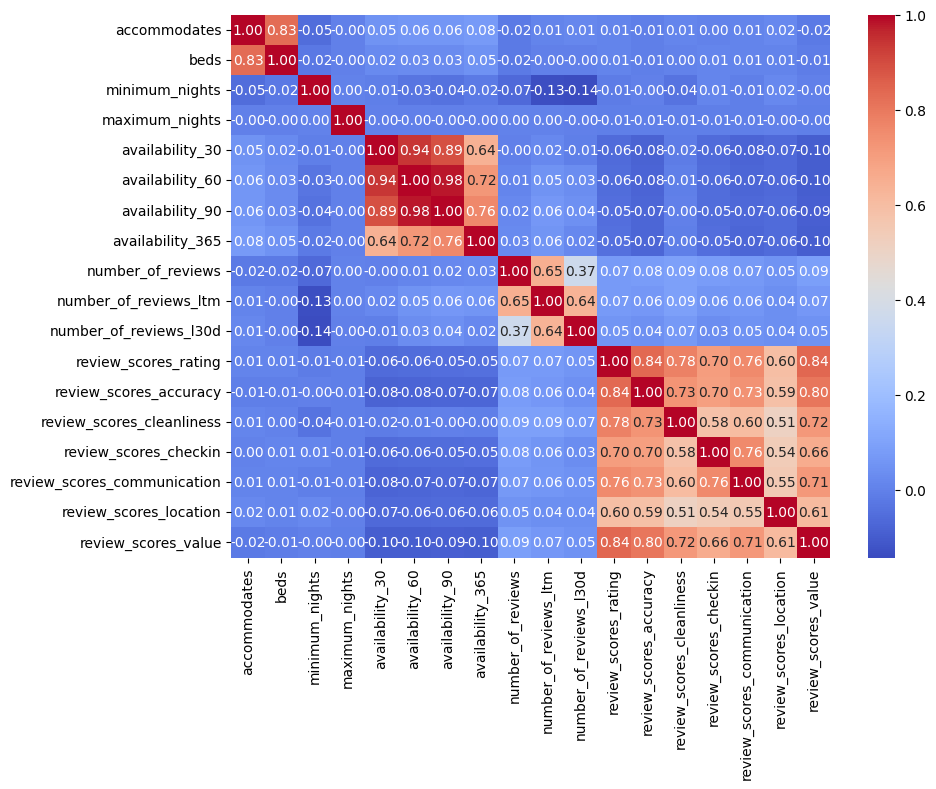

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

<Axes: ylabel='minimum_nights_avg_ntm'>

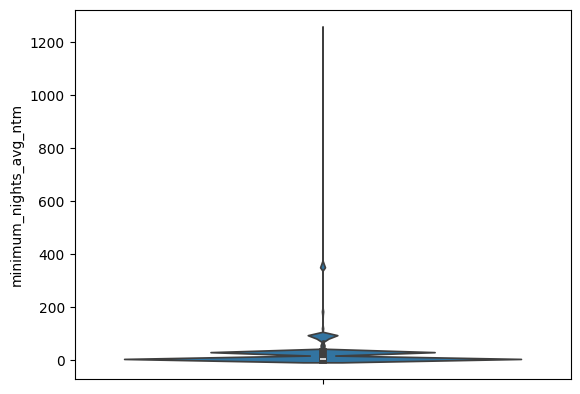

In [24]:
sns.violinplot(listings['minimum_nights_avg_ntm'])

In [25]:
def get_full_summary(df, exclude_columns=None):
    
    if exclude_columns is None:
        exclude_columns = []
    
    # Exclude specified columns
    df_filtered = df.drop(columns=exclude_columns)
    
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df_filtered.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df_filtered.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df_filtered.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns, excluding specified columns
    categorical_summary = df_filtered.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}


# Specify columns to exclude
exclude_columns = ['id', 'listing_url', 'scrape_id', 'host_id', 'host_url', 
                       'host_thumbnail_url', 'host_picture_url', 'name', 'description', 
                       'neighborhood_overview', 'host_about', 'amenities', 'bathrooms_text', 
                       'last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 
                       'last_review', 'source', 'host_neighbourhood', 'calendar_updated', 'license', 'picture_url']
full_summary = get_full_summary(reviews, None)

print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

Numeric Summary:
          listing_id            id   reviewer_id
count   4.086901e+06  4.086901e+06  4.086901e+06
mean    1.286849e+17  4.104130e+17  1.519084e+08
std     2.878550e+17  4.130155e+17  1.484143e+08
min     9.580000e+02  1.981000e+03  1.000000e+00
25%     1.102017e+07  3.438002e+08  3.152565e+07
50%     2.462662e+07  4.497724e+17  9.911354e+07
75%     4.834545e+07  8.276150e+17  2.318731e+08
max     1.073350e+18  1.087798e+18  5.601695e+08
median  2.462662e+07  4.497724e+17  9.911354e+07

Categorical Summary:
              date reviewer_name comments
count      4086901       4086895  4086253
unique        5121        320756  3915471
top     2023-07-09         David        .
freq          6929         31661     5322


In [26]:
def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()



In [27]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analyze_data_cleaning_needs(listings)

{'missing_values': id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
                                                 ...  
 calculated_host_listings_count_private_rooms        0
 calculated_host_listings_count_shared_rooms         0
 reviews_per_month                               49970
 BOOKING_RATE                                    49970
 BOOKING_RATE_LOG                                49970
 Length: 77, dtype: int64,
 'data_types': id                                                int64
 listing_url                                      object
 scrape_id                                         int64
 last_scraped                                     object
 source                                           object
                                                  .

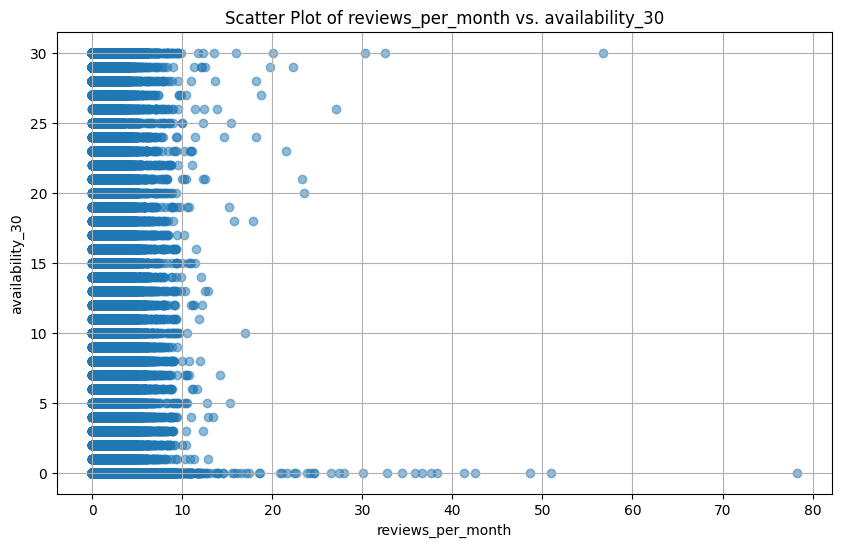

In [28]:
def plot_scatter(df, column_x, column_y):
  
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.scatter(df[column_x], df[column_y], alpha=0.5)  # Create scatter plot with some transparency
    plt.title(f'Scatter Plot of {column_x} vs. {column_y}')  # Set the title of the plot
    plt.xlabel(column_x)  # Set the x-axis label
    plt.ylabel(column_y)  # Set the y-axis label
    plt.grid(True)  # Add a grid for better readability
    plt.show()  # Display the plot

plot_scatter(listings, 'reviews_per_month', 'availability_30')


In [29]:
#aggregate scores togther 
# Filter out the relevant score columns
score_columns = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

# Create a new DataFrame with only the score columns
scores_df = df[score_columns]

# Calculate the average score for each listing
# replace NaN with the column mean (considering only non-missing values for each score)
scores_df.fillna(scores_df.mean(), inplace=True)

# Calculate the aggregated score as the mean across the columns for each row
df['aggregated_score'] = scores_df.mean(axis=1)

# Inspect the new DataFrame with the aggregated score
print(df[['id', 'aggregated_score']].head())


NameError: name 'df' is not defined

In [30]:
print(df[[
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]])

NameError: name 'df' is not defined

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

listings_withReviews = listings.dropna(subset=independent_vars + [dependent_var])

# Split the data into independent X and dependent y variables
X = listings_withReviews[independent_vars]
y = listings_withReviews[dependent_var]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the booking rates with the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model evaluation
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
print(lr.summary())

Mean Squared Error (MSE): 3.0195347799451175
R-squared (R2 ): 0.015178144178692454
                            OLS Regression Results                            
Dep. Variable:       BOOKING_RATE_LOG   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:30:25   Log-Likelihood:            -2.1285e+05
No. Observations:              107839   AIC:                         4.257e+05
Df Residuals:                  107831   BIC:                         4.258e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

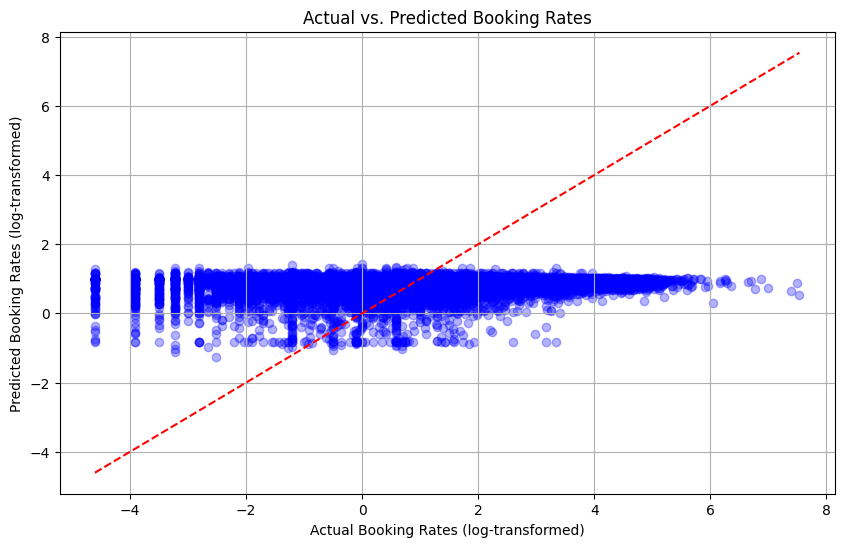

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')  # alpha for transparency helps to see the density
plt.title('Actual vs. Predicted Booking Rates')
plt.xlabel('Actual Booking Rates (log-transformed)')
plt.ylabel('Predicted Booking Rates (log-transformed)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.grid(True)
plt.show()

In [82]:
df_combined = pd.DataFrame({'Actual Booking Rates': y_test, 'Predicted Booking Rates': y_pred})

# Display the first few rows of the DataFrame
print(df_combined.head(30))

       Actual Booking Rates  Predicted Booking Rates
8236               0.336472                 0.786135
53325              1.229641                 0.857496
21529              3.380995                 0.976128
29802             -0.562119                 1.002456
52876              1.178655                 0.861607
49619              1.291984                 0.886348
36934             -2.995732                 0.944236
1940               3.717467                 0.973573
18679              1.671473                 1.002456
36920             -1.386294                 0.997669
5769               3.716008                 0.982656
24166              1.050822                 1.021065
24151              0.182322                 0.664183
33669              1.280934                 1.002456
8745               0.482426                 0.086954
80670             -3.506558                 0.142916
8007               2.989714                 0.997536
66290              0.712950                 1.

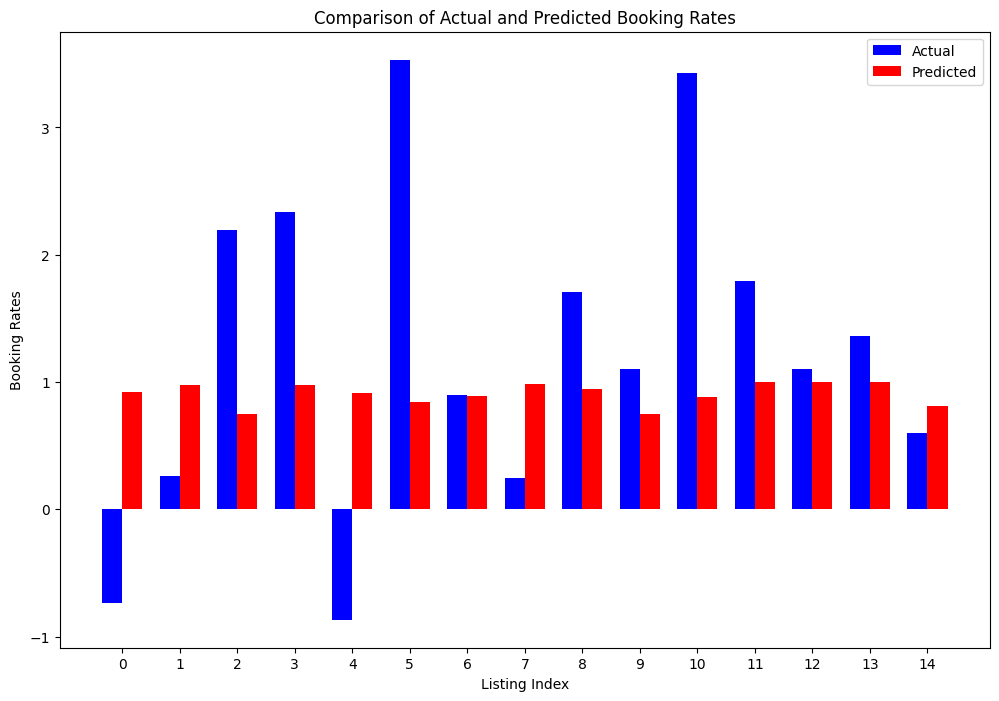

In [94]:
plot_subset = df_combined.sample(n=15)

# Setting up the figure
plt.figure(figsize=(12, 8))
# Bar width
bar_width = 0.35
# Index for the bars
index = np.arange(len(plot_subset))

# Plotting
plt.bar(index, plot_subset['Actual Booking Rates'], bar_width, label='Actual', color='b')
plt.bar(index + bar_width, plot_subset['Predicted Booking Rates'], bar_width, label='Predicted', color='r')

# Adding labels and title
plt.xlabel('Listing Index')
plt.ylabel('Booking Rates')
plt.title('Comparison of Actual and Predicted Booking Rates')
plt.xticks(index + bar_width / 2, index)  # Set x-ticks position
plt.legend()

# Show the plot
plt.show()

In [ ]:
dependent_var = 'BOOKING_RATE_LOG'
independent_vars = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]


## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

In [32]:
#RQ2 

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from langdetect import detect
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

def combine_data(source_folder_name="raw-dataset"):
    locations = ['toronto', 'sanfran', 'nyc', 'london', 'sydney']
    types = ['listings', 'reviews']
    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            d = pd.read_csv(filename)
            data.append(d)

        if t == 'listings':
            listings = pd.concat(data)
        if t == 'reviews':
            reviews = pd.concat(data)

combine_data()

# After combining, immediately calculate the booking rate log
listings['BOOKING_RATE_LOG'] = np.log(listings['minimum_nights'] * listings['reviews_per_month'] + 1)  # +1 to avoid log(0)

# Count reviews for each listing
review_counts = reviews['listing_id'].value_counts()

# Get the IDs of listings with between 100 and 300 reviews
listings_with_100_to_300_reviews = review_counts[(review_counts >= 100) & (review_counts <= 300)].index

# Randomly sample 10,000 listing IDs (or all available if less than 10,000)
random_sample_listings = np.random.choice(listings_with_100_to_300_reviews, size=min(10000, len(listings_with_100_to_300_reviews)), replace=False)

# Filter reviews for these listing IDs
reviews_for_sampled_listings = reviews[reviews['listing_id'].isin(random_sample_listings)]

# Function to sample 5 reviews per listing
def sample_20_reviews(group):
    return group.sample(n=20, replace=False)  # Ensure sampling without replacement

# Apply the function to each group of listing reviews
sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Print the number of sampled listings and reviews
print(f"Number of sampled listings: {len(random_sample_listings)}")
print(f"Total number of sampled reviews: {len(sampled_reviews)}")
pled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Store unique listing IDs
sampled_listing_ids = set(sampled_reviews['listing_id'].unique())
print(f"Stored {len(sampled_listing_ids)} unique listing IDs for later use.")

# Define a function to preprocess text data
def preprocess_text(text):
    try:
        if detect(text) != 'en':
            return None
    except:
        return None
    lower_text = text.lower()
    clean_text = ''.join([char for char in lower_text if char not in string.punctuation and not char.isdigit()])
    words = clean_text.split()
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to each review
sampled_reviews['processed_comments'] = sampled_reviews['comments'].apply(preprocess_text)
sampled_reviews.dropna(subset=['processed_comments'], inplace=True)

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if text is None:
        return 0
    return sia.polarity_scores(text)['compound']

sampled_reviews['sentiment_score'] = sampled_reviews['processed_comments'].apply(get_sentiment)

# Calculate average sentiment for each listing
average_sentiment = sampled_reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()
average_sentiment.columns = ['listing_id', 'average_sentiment']

# Merge average sentiment with listings data
listings_with_sentiment = pd.merge(listings, average_sentiment, left_on='id', right_on='listing_id', how='inner')

def categorize_sentiment(score):
    if score >= 0.8:
        return 'High Positive'
    elif score >= 0.2:
        return 'Positive'
    elif score > -0.2:
        return 'Neutral'
    elif score >= -0.8:
        return 'Negative'
    else:
        return 'High Negative'

# Apply the categorization function to your sentiment scores
listings_with_sentiment['sentiment_category'] = listings_with_sentiment['average_sentiment'].apply(categorize_sentiment)

# Correlation calculation
correlation = listings_with_sentiment[['average_sentiment', 'BOOKING_RATE_LOG']].corr()
print(correlation)


ModuleNotFoundError: No module named 'nltk'

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a categorical scatter plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentiment_category', y='BOOKING_RATE_LOG', data=listings_with_sentiment, order=['High Negative', 'Negative', 'Neutral', 'Positive', 'High Positive'])
plt.title('Correlation between Sentiment Categories and Booking Rate Log')
plt.xlabel('Sentiment Category')
plt.ylabel('Booking Rate Log')
plt.grid(True)
plt.show()



NameError: name 'listings_with_sentiment' is not defined

<Figure size 1200x800 with 0 Axes>

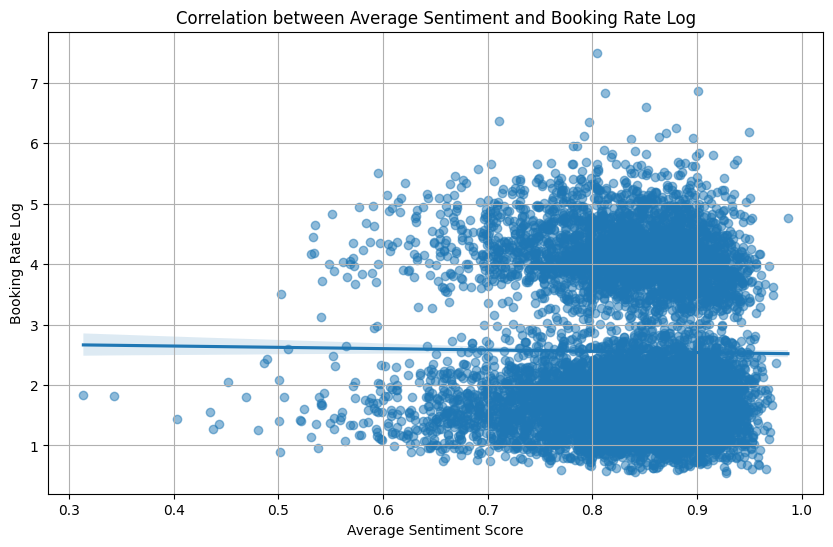

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='average_sentiment', y='BOOKING_RATE_LOG', data=listings_with_sentiment, scatter_kws={'alpha':0.5})
plt.title('Correlation between Average Sentiment and Booking Rate Log')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Booking Rate Log')
plt.grid(True)
plt.show()

In [ ]:
# After sampling the listing IDs
print(f"Number of sampled listings: {len(random_sample_listings)}")

# Apply the function to each group of listing reviews
sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)

# Print the number of reviews that will be used moving forward
print(f"Total number of reviews moving forward: {len(sampled_reviews)}")


Number of sampled listings: 8900


C:\Users\henry\AppData\Local\Temp\ipykernel_11060\1352475656.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_reviews = reviews_for_sampled_listings.groupby('listing_id').apply(sample_20_reviews).reset_index(drop=True)


Total number of reviews moving forward: 178000


In [ ]:
#checking sentiment accuracy 

import pandas as pd

# Assuming `sampled_reviews` already has a column `sentiment_score` calculated
def categorize_sentiment(score):
    if score >= 0.8:
        return 'High Positive'
    elif score >= 0.2:
        return 'Positive'
    elif score > -0.2:
        return 'Neutral'
    elif score >= -0.8:
        return 'Negative'
    else:
        return 'High Negative'

# Apply categorization
sampled_reviews['sentiment_category'] = sampled_reviews['sentiment_score'].apply(categorize_sentiment)

# Count reviews in each sentiment category
sentiment_counts = sampled_reviews['sentiment_category'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)

# Function to sample 3 reviews from each category
def sample_reviews(group):
    return group.sample(n=min(3, len(group)))

# Group by 'sentiment_category' and apply the sampling function
sampled_by_category = sampled_reviews.groupby('sentiment_category').apply(sample_reviews)

# Drop the multi-index created by groupby if necessary
sampled_by_category.reset_index(drop=True, inplace=True)

# Print the sampled reviews for each category
for category in sampled_by_category['sentiment_category'].unique():
    print(f"\nCategory: {category}")
    for review in sampled_by_category[sampled_by_category['sentiment_category'] == category]['comments']:
        print(f"- {review}")



KeyError: 'sentiment_score'

## RQ3: How do the latency of host responses and communcation rating impact booking rate?

In [34]:
# preparing dataframe for 3rd research question

relevant_columns_rq3 = [
    'id',
    'review_scores_communication',
    'host_response_time',
    'BOOKING_RATE_LOG'
]

rq3 = listings[relevant_columns_rq3]

# filter out null values, since we need all 3 to compute
rq3 = rq3.dropna(subset=['review_scores_communication', 'BOOKING_RATE_LOG'])

def map_response_time(response_catagory):
    if response_catagory == 'within an hour':
        return 1
    elif response_catagory == 'within a few hours':
        return 5 # few = max five hours
    elif response_catagory == 'within a day':
        return 24
    elif response_catagory == 'a few days or more':
        return 72 # estimated of 3 days 
    
    return -1 # -1 meaning we don't know

rq3['HOST_RESPONSE_TIME_SCORED'] = rq3['host_response_time'].apply(map_response_time)


In [42]:

# Calculating the original booking rates from the log values
rq3['original_booking_rate'] = np.exp(rq3['BOOKING_RATE_LOG'])

# Print the first few entries of the original booking rates to check
print(rq3['original_booking_rate'])

print(rq3)['review_scores_communication']

0         1.83
3        14.28
4         6.92
5         0.49
6         0.25
         ...  
25471     2.72
25473     1.12
25475     2.74
25478     4.00
25479     5.04
Name: original_booking_rate, Length: 90063, dtype: float64
                        id  review_scores_communication host_response_time  \
0                 24018771                         4.78     within an hour   
3       842991103042611460                         5.00     within an hour   
4      1004965626999219484                         5.00     within an hour   
5       924249347864823562                         5.00     within an hour   
6                 51907095                         5.00     within an hour   
...                    ...                          ...                ...   
25471   679969354455556146                         4.91     within an hour   
25473   954604282011021722                         5.00     within an hour   
25475   859898424946080662                         4.92     within an hour

TypeError: 'NoneType' object is not subscriptable

None
within an hour
within a few hours
within a day
a few days or more


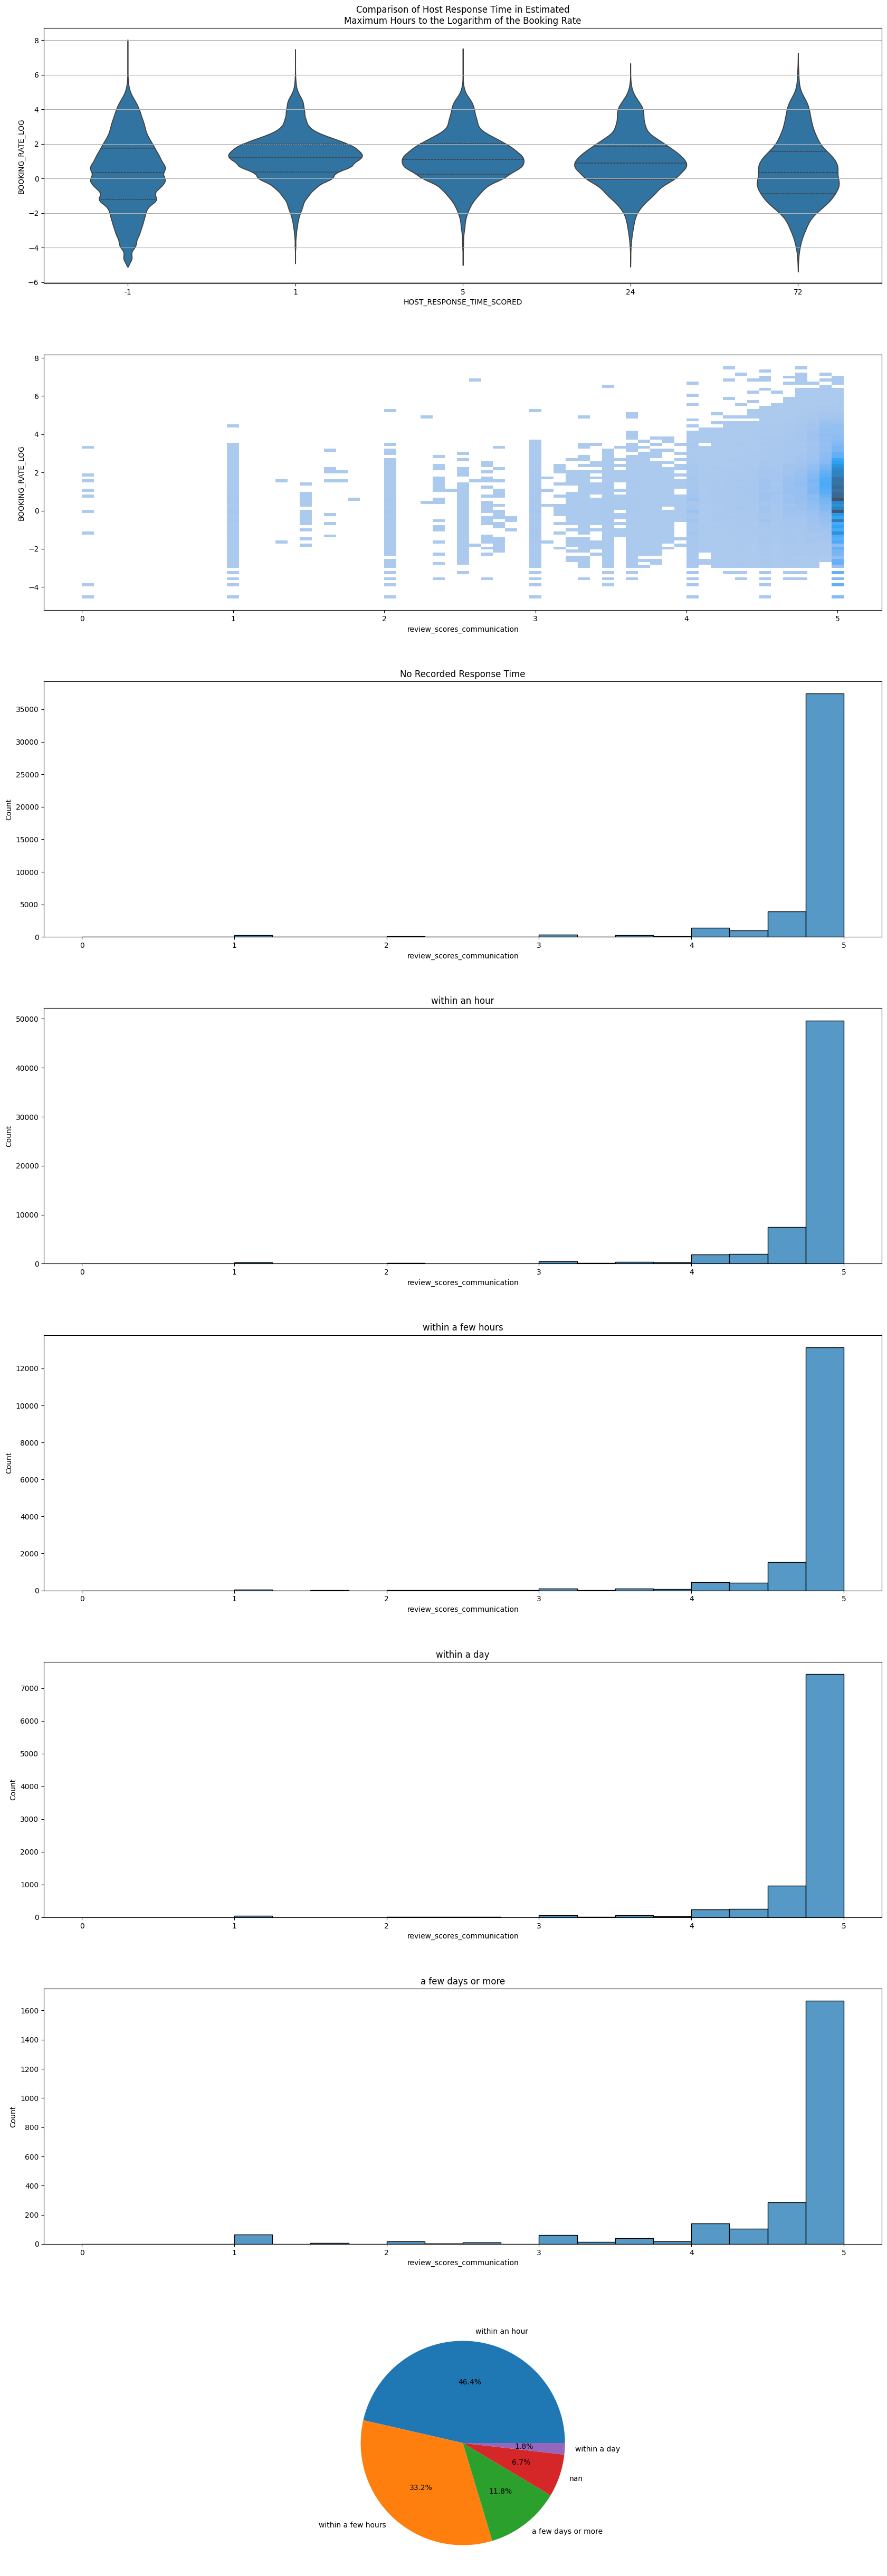

In [35]:
fig, ax = plt.subplots(8, 1, figsize=(18, 50))

sns.violinplot(rq3, ax=ax[0], x='HOST_RESPONSE_TIME_SCORED', y='BOOKING_RATE_LOG', inner='quart')
ax[0].set_title('Comparison of Host Response Time in Estimated\nMaximum Hours to the Logarithm of the Booking Rate')
ax[0].grid(axis='y')


sns.histplot(rq3, ax=ax[1], x='review_scores_communication', y='BOOKING_RATE_LOG', binwidth=(0.08, 0.16))

categories = [None, 'within an hour', 'within a few hours', 'within a day', 'a few days or more']
for i,category in enumerate(categories):
    print(category)
    subset_rq3 = rq3[rq3['HOST_RESPONSE_TIME_SCORED'] == map_response_time(category)]

    sns.histplot(subset_rq3, ax=ax[2+i], x='review_scores_communication', bins=20, binrange=(0,5))
    ax[2+i].set_title("No Recorded Response Time" if category is None else category)
    # ax[2+i].set_yscale('log')

response_counts = rq3['host_response_time'].value_counts(dropna=False)
plt.pie(response_counts, autopct='%1.1f%%', labels=rq3['host_response_time'].unique())

# normalized_counts = rq3.groupby('host_response_time').size() / len(rq3)
# sns.histplot(
#     rq3, 
#     ax=ax[2+i], x='review_scores_communication', 
#     hue='host_response_time',
#     # hue_order=normalized_counts.index,
#     bins=10, 
#     binrange=(0,5), 
#     stat='count',
#     multiple='dodge'

# )
# ax[2+i].set_title("test")
# ax[2+i].set_yscale('log')

# sns.histplot(rq3, ax=ax[7], x='HOST_RESPONSE_TIME_SCORED')
# ax[7].set_title("Distribution of Host Response Times")


fig.tight_layout(pad=5.0)


In [ ]:
'''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input



t = rq3.groupby('host_response_time')
model_rq3 = rq3[rq3['HOST_RESPONSE_TIME_SCORED'] != -1]

X = model_rq3.drop(columns=['id', 'host_response_time', 'BOOKING_RATE_LOG'])
y = model_rq3['BOOKING_RATE_LOG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4951)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1], )),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

model.fit(X_train, y_train, epochs=16, batch_size=32, validation_data=(X_test, y_test))

'''

Epoch 1/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2085 - val_loss: 2.0732
Epoch 2/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1047 - val_loss: 2.0679
Epoch 3/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1119 - val_loss: 2.0607
Epoch 4/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.0803 - val_loss: 2.0751
Epoch 5/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1185 - val_loss: 2.0566
Epoch 6/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0997 - val_loss: 2.0561
Epoch 7/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.0878 - val_loss: 2.0570
Epoch 8/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1105 - val_loss: 2.0653
Epoch 9/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1056 - val_loss: 2.0582
Epoch 10/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0993 - val_loss: 2.0589
Epoch 11/16
2252/2252 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1130 - val_loss: 2.0542
Epoch 12/16
2252/2252 ━━━━━━━━

In [ ]:
x = np.array([1, 1]).reshape(1, -1)

model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


array([[0.16558827]], dtype=float32)

In [55]:
import statsmodels.api as sm

# Setting up the regression model
X = rq3[['HOST_RESPONSE_TIME_SCORED', 'review_scores_communication']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = rq3['BOOKING_RATE_LOG']

model = sm.OLS(y, X).fit()  # OLS stands for Ordinary Least Squares
summary = model.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:       BOOKING_RATE_LOG   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1064.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:42:29   Log-Likelihood:            -1.6099e+05
No. Observations:               90063   AIC:                         3.220e+05
Df Residuals:                   90060   BIC:                         3.220e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             